<a href="https://colab.research.google.com/github/Samar090/Zeus_09/blob/main/Automateapi%26visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import pandas as pd
import json
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)




In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now') # Provides the timestamp of when we accessed the data
df

<ipython-input-22-b9aabd02d734>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now') # Provides the timestamp of when we accessed the data


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10477,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949530e+07,1.949530e+07,False,NaN,1,NaN,NaN,None,2023-09-25T08:00:00.000Z,26182.364297,1.070497e+10,64.9946,0.145128,-1.442953,-2.001779,0.561206,-10.993462,-13.903751,5.104330e+11,48.9403,5.498297e+11,None,2023-09-25T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 08:02:40.880850
1,1027,Ethereum,ETH,ethereum,7432,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202292e+08,1.202292e+08,True,NaN,2,NaN,NaN,None,2023-09-25T08:00:00.000Z,1580.693719,4.037625e+09,110.0420,0.128804,-0.709506,-3.285903,-4.322200,-15.564790,-15.709749,1.900455e+11,18.2201,1.900455e+11,None,2023-09-25T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 08:02:40.880850
2,825,Tether USDt,USDT,tether,62766,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.320374e+10,8.642620e+10,True,NaN,3,NaN,NaN,None,2023-09-25T08:00:00.000Z,0.999778,1.649221e+10,52.6638,-0.036453,-0.027137,-0.045378,0.029872,-0.034519,-0.019020,8.318527e+10,7.9752,8.640701e+10,None,2023-09-25T08:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-25 08:02:40.880850
3,1839,BNB,BNB,bnb,1636,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538473e+08,1.538473e+08,False,NaN,4,NaN,NaN,None,2023-09-25T08:00:00.000Z,209.381095,3.249150e+08,52.5605,0.139352,-0.527732,-3.516909,-3.564949,-13.418187,-12.220483,3.221272e+10,3.0883,3.221272e+10,None,2023-09-25T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 08:02:40.880850
4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,None,2023-09-25T08:00:00.000Z,0.496082,6.471583e+08,77.8894,-0.087381,-2.430845,0.880782,-4.869472,-30.356204,3.425874,2.641398e+10,2.5324,4.960816e+10,None,2023-09-25T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 08:02:40.880850
5,3408,USDC,USDC,usd-coin,14224,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.578010e+10,2.578010e+10,False,NaN,6,NaN,NaN,None,2023-09-25T08:00:00.000Z,0.999998,2.363211e+09,61.1686,-0.030994,-0.002755,-0.015663,-0.007486,-0.016575,0.005706,2.578005e+10,2.4716,2.578005e+10,None,2023-09-25T08:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-25 08:02:40.880850
6,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.511962e+10,3.619858e+10,False,NaN,7,NaN,NaN,None,2023-09-25T08:00:00.000Z,0.245127,9.125417e+07,42.5118,0.122594,-0.155547,-1.376286,-5.789899,-21.106277,-13.287753,8.608772e+09,0.8253,1.103072e+10,None,2023-09-25T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 08:02:40.880850
7,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411480e+11,1.411480e+11,True,NaN,8,NaN,NaN,None,2023-09-25T08:00:00.000Z,0.060880,1.350631e+08,25.2764,0.127742,-1.016080,-1.527745,-3.643314,-22.724266,-6.743982,8.593114e+09,0.8239,8.593114e+09,None,2023-09-25T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 08:02:40.880850
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings

In [ ]:
def auto_api():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
  headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

  session = Session()
  session.headers.update(headers)

  try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

      df2 = pd.json_normalize(data['data'])
      df2['timestamp'] = pd.to_datetime('now') # Provides the timestamp of when we accessed the data
      df=df.append(df2)#New data that wil come from the website will get append in the original dataframe





In [ ]:
import os
from time import time
from time import sleep
#They give us the ability to track the time and to call the above created function in time intervals

for i in range(333):
  auto_api()
  print("Api automated successfully")
  sleep(60)#The function auto_api will sleep for 1 minute
exit()



Api automated successfully
Api automated successfully


KeyboardInterrupt: ignored

In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10477,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949530e+07,1.949530e+07,False,NaN,1,NaN,NaN,None,2023-09-25T08:00:00.000Z,26182.364297,1.070497e+10,64.9946,0.145128,-1.442953,-2.001779,0.561206,-10.993462,-13.903751,5.104330e+11,48.9403,5.498297e+11,None,2023-09-25T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 08:02:40.880850
1,1027,Ethereum,ETH,ethereum,7432,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202292e+08,1.202292e+08,True,NaN,2,NaN,NaN,None,2023-09-25T08:00:00.000Z,1580.693719,4.037625e+09,110.0420,0.128804,-0.709506,-3.285903,-4.322200,-15.564790,-15.709749,1.900455e+11,18.2201,1.900455e+11,None,2023-09-25T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 08:02:40.880850
2,825,Tether USDt,USDT,tether,62766,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.320374e+10,8.642620e+10,True,NaN,3,NaN,NaN,None,2023-09-25T08:00:00.000Z,0.999778,1.649221e+10,52.6638,-0.036453,-0.027137,-0.045378,0.029872,-0.034519,-0.019020,8.318527e+10,7.9752,8.640701e+10,None,2023-09-25T08:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-25 08:02:40.880850
3,1839,BNB,BNB,bnb,1636,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538473e+08,1.538473e+08,False,NaN,4,NaN,NaN,None,2023-09-25T08:00:00.000Z,209.381095,3.249150e+08,52.5605,0.139352,-0.527732,-3.516909,-3.564949,-13.418187,-12.220483,3.221272e+10,3.0883,3.221272e+10,None,2023-09-25T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 08:02:40.880850
4,52,XRP,XRP,xrp,1098,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,False,NaN,5,NaN,NaN,None,2023-09-25T08:00:00.000Z,0.496082,6.471583e+08,77.8894,-0.087381,-2.430845,0.880782,-4.869472,-30.356204,3.425874,2.641398e+10,2.5324,4.960816e+10,None,2023-09-25T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 08:02:40.880850
5,3408,USDC,USDC,usd-coin,14224,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.578010e+10,2.578010e+10,False,NaN,6,NaN,NaN,None,2023-09-25T08:00:00.000Z,0.999998,2.363211e+09,61.1686,-0.030994,-0.002755,-0.015663,-0.007486,-0.016575,0.005706,2.578005e+10,2.4716,2.578005e+10,None,2023-09-25T08:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-25 08:02:40.880850
6,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.511962e+10,3.619858e+10,False,NaN,7,NaN,NaN,None,2023-09-25T08:00:00.000Z,0.245127,9.125417e+07,42.5118,0.122594,-0.155547,-1.376286,-5.789899,-21.106277,-13.287753,8.608772e+09,0.8253,1.103072e+10,None,2023-09-25T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 08:02:40.880850
7,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411480e+11,1.411480e+11,True,NaN,8,NaN,NaN,None,2023-09-25T08:00:00.000Z,0.060880,1.350631e+08,25.2764,0.127742,-1.016080,-1.527745,-3.643314,-22.724266,-6.743982,8.593114e+09,0.8239,8.593114e+09,None,2023-09-25T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-25 08:02:40.880850
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings

In [ ]:
df3=df.groupby('name',sort=False)[['quote.USD.price','quote.USD.volume_24h','quote.USD.volume_change_24h','quote.USD.percent_change_24h']].mean()
df3

,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_24h
name,,,,
Bitcoin,26182.364297,1.070497e+10,64.9946,-1.442953
Ethereum,1580.693719,4.037625e+09,110.0420,-0.709506
Tether USDt,0.999778,1.649221e+10,52.6638,-0.027137
BNB,209.381095,3.249150e+08,52.5605,-0.527732
XRP,0.496082,6.471583e+08,77.8894,-2.430845
USDC,0.999998,2.363211e+09,61.1686,-0.002755
Cardano,0.245127,9.125417e+07,42.5118,-0.155547
Dogecoin,0.060880,1.350631e+08,25.2764,-1.016080
Solana,19.481135,1.394047e+08,46.4084,-0.702605


In [ ]:
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.price                 2.618236e+04
             quote.USD.volume_24h            1.070497e+10
             quote.USD.volume_change_24h     6.499460e+01
             quote.USD.percent_change_24h   -1.442953e+00
Ethereum     quote.USD.price                 1.580694e+03
             quote.USD.volume_24h            4.037625e+09
             quote.USD.volume_change_24h     1.100420e+02
             quote.USD.percent_change_24h   -7.095061e-01
Tether USDt  quote.USD.price                 9.997779e-01
             quote.USD.volume_24h            1.649221e+10
             quote.USD.volume_change_24h     5.266380e+01
             quote.USD.percent_change_24h   -2.713750e-02
BNB          quote.USD.price                 2.093811e+02
             quote.USD.volume_24h            3.249150e+08
             quote.USD.volume_change_24h     5.256050e+01
             quote.USD.percent_change_24h   -5.277321e-01
XRP          quote.USD.price  

In [ ]:
df5=df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin     quote.USD.price               2.618236e+04
            quote.USD.volume_24h          1.070497e+10
            quote.USD.volume_change_24h   6.499460e+01
            quote.USD.percent_change_24h -1.442953e+00
Ethereum    quote.USD.price               1.580694e+03
            quote.USD.volume_24h          4.037625e+09
            quote.USD.volume_change_24h   1.100420e+02
            quote.USD.percent_change_24h -7.095061e-01
Tether USDt quote.USD.price               9.997779e-01
            quote.USD.volume_24h          1.649221e+10
            quote.USD.volume_change_24h   5.266380e+01
            quote.USD.percent_change_24h -2.713750e-02
BNB         quote.USD.price               2.093811e+02
            quote.USD.volume_24h          3.249150e+08
            quote.USD.volume_change_24h   5.256050e+01
            quote.USD.percent_change_24h -5.277321e-01
XRP         quote.USD.price               4.960816e-01
            quote.USD.volume_24h          6.471583e+08
            quote.USD.volume_change_24h   7.788940e+01
            quote.USD.percent_change_24h -2.430845e+00
USDC        quote.USD.price               9.999981e-01
            quote.USD.volume_24h          2.363211e+09
            quote.USD.volume_change_24h   6.116860e+01
            quote.USD.percent_change_24h -2.754560e-03
Cardano     quote.USD.price               2.451271e-01
            quote.USD.volume_24h          9.125417e+07
            quote.USD.volume_change_24h   4.251180e+01
            quote.USD.percent_change_24h -1.555466e-01
Dogecoin    quote.USD.price               6.088016e-02
            quote.USD.volume_24h          1.350631e+08
            quote.USD.volume_change_24h   2.527640e+01
            quote.USD.percent_change_24h -1.016080e+00
Solana      quote.USD.price               1.948113e+01
            quote.USD.volume_24h          1.394047e+08
            quote.USD.volume_change_24h   4.640840e+01
            quote.USD.percent_change_24h -7.026051e-01
Toncoin     quote.USD.price               2.192214e+00
            quote.USD.volume_24h          2.622621e+07
            quote.USD.volume_change_24h   1.985170e+01
            quote.USD.percent_change_24h -3.336390e+00
TRON        quote.USD.price               8.433642e-02
            quote.USD.volume_24h          1.467413e+08
            quote.USD.volume_change_24h   3.444320e+01
            quote.USD.percent_change_24h  4.110699e-01
Dai         quote.USD.price               9.999198e-01
            quote.USD.volume_24h          5.694960e+07
            quote.USD.volume_change_24h   4.339900e+00
            quote.USD.percent_change_24h -6.930380e-03
Polkadot    quote.USD.price               4.060718e+00
            quote.USD.volume_24h          8.425025e+07
            quote.USD.volume_change_24h   5.091730e+01
            quote.USD.percent_change_24h  1.086906e+00
Polygon     quote.USD.price               5.147434e-01
            quote.USD.volume_24h          1.711461e+08
            quote.USD.volume_change_24h   3.685840e+01
            quote.USD.percent_change_24h -1.068873e+00
Litecoin    quote.USD.price               6.448747e+01
            quote.USD.volume_24h          2.059177e+08
            quote.USD.volume_change_24h  -7.282000e-01
            quote.USD.percent_change_24h -2.770284e-01

In [ ]:
df5.count()

values    60
dtype: int64

In [ ]:
index=pd.Index(range(60))
i=index.all()
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.price,2.618236e+04
1,Bitcoin,quote.USD.volume_24h,1.070497e+10
2,Bitcoin,quote.USD.volume_change_24h,6.499460e+01
3,Bitcoin,quote.USD.percent_change_24h,-1.442953e+00
4,Ethereum,quote.USD.price,1.580694e+03
5,Ethereum,quote.USD.volume_24h,4.037625e+09
6,Ethereum,quote.USD.volume_change_24h,1.100420e+02
7,Ethereum,quote.USD.percent_change_24h,-7.095061e-01
8,Tether USDt,quote.USD.price,9.997779e-01
9,Tether USDt,quote.USD.volume_24h,1.649221e+10


In [ ]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.price,2.618236e+04
1,Bitcoin,quote.USD.volume_24h,1.070497e+10
2,Bitcoin,quote.USD.volume_change_24h,6.499460e+01
3,Bitcoin,quote.USD.percent_change_24h,-1.442953e+00
4,Ethereum,quote.USD.price,1.580694e+03
5,Ethereum,quote.USD.volume_24h,4.037625e+09
6,Ethereum,quote.USD.volume_change_24h,1.100420e+02
7,Ethereum,quote.USD.percent_change_24h,-7.095061e-01
8,Tether USDt,quote.USD.price,9.997779e-01
9,Tether USDt,quote.USD.volume_24h,1.649221e+10


In [56]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.price','quote.USD.volume_24h','quote.USD.volume_change_24h','quote.USD.percent_change_24h'],['price','V24','VC24','24h'])
df7


,name,percent_change,values
0,Bitcoin,price,2.618236e+04
1,Bitcoin,V24,1.070497e+10
2,Bitcoin,VC24,6.499460e+01
3,Bitcoin,24h,-1.442953e+00
4,Ethereum,price,1.580694e+03
5,Ethereum,V24,4.037625e+09
6,Ethereum,VC24,1.100420e+02
7,Ethereum,24h,-7.095061e-01
8,Tether USDt,price,9.997779e-01
9,Tether USDt,V24,1.649221e+10


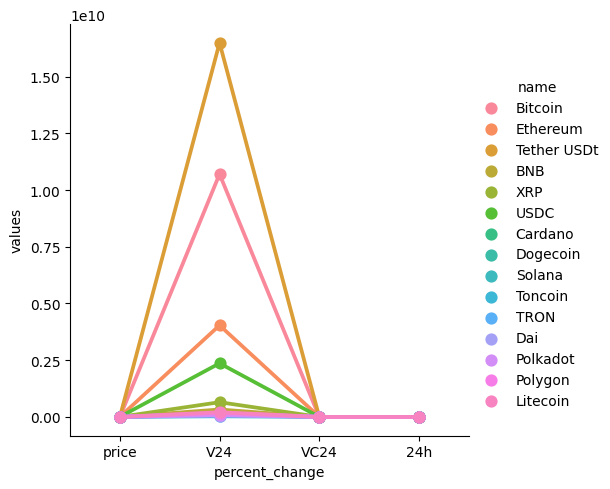

In [57]:
import seaborn as s
s.catplot(x='percent_change',y='values',data=df7,hue='name',kind='point')